In [1]:
from utils.chat import OllamaChat
from utils.prompts import get_persona
from company_about_summarizer import summarize_company_about
from utils.example_company.company_about import company_data
from utils.example_company.example_customer import example_customer
from utils.example_company.products_data import Products_data
import json
from langGraph import build_sales_workflow
from langgraph.graph import StateGraph, END


/home/hamza/Desktop/projects/FYP-main/venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Error loading conversation: not enough values to unpack (expected 2, got 1)


# Summarizing the Company Data

In [2]:
company_data_summarized=summarize_company_about(company_data)


Error loading conversation: not enough values to unpack (expected 2, got 1)


In [16]:
system_prompt = get_persona("general_sales_agent",company_data=company_data_summarized)

In [5]:
chat = OllamaChat(
        model='llama3.1',  
        system_prompt=system_prompt,
        n_ctx=8000,
        temperature=1.2
    )

NameError: name 'system_prompt' is not defined

# Greeting the Customer

In [18]:
result=chat.chat(user_prompt="hello ?")

In [19]:
chat.conversation_history

[{'role': 'user', 'content': 'hello ?'},
 {'role': 'assistant',
  'content': "Hello! My name is Alex, and I'm reaching out from TechCare AI. I hope you're doing well today. I was wondering if I could take just a minute of your time to talk about how we might be able to support your business. Would now be a good time for us to chat?"}]

In [21]:
print(result)

Hello! My name is Alex, and I'm reaching out from TechCare AI. I hope you're doing well today. I was wondering if I could take just a minute of your time to talk about how we might be able to support your business. Would now be a good time for us to chat?


# Shifting to Pitching Now

In [2]:


customer_data=json.dumps(example_customer)


product_service_details=json.dumps(Products_data["products_and_services"][0])



In [ ]:
chat.system_prompt=get_persona("product_pitch_agent",customer_data=customer_data,product_service_details=product_service_details)

In [25]:
result=chat.chat(user_prompt="Yeah sure")
result=chat.chat(user_prompt="well umm  how exactly it can help me in my business?")

In [27]:
print(result)

Let's dive into that.

Firstly, with ServiceFlow AI, you'll be able to significantly reduce the time spent on manually routing tickets and responding to common queries. Our automated responses will ensure consistency across your customer interactions, which is crucial for building trust and reputation.

Secondly, our system will help you improve the accuracy of issue resolution by routing tickets to the right agents with expertise in those areas. This means faster resolutions for customers, and ultimately, higher satisfaction rates.

Thirdly, ServiceFlow AI can help you scale your operations more efficiently. As your business grows, so does the volume of customer inquiries. Our system will ensure that you're equipped to handle this increase without compromising on service quality.

Lastly, our multilingual support feature means you'll be able to cater to a broader customer base, including those who may not speak the same language as your team. This can lead to increased brand awareness

# Closing the call

In [29]:
CLOSING_AGENT = """You are Alex, a professional and courteous sales representative at TechCare AI. 
Your goal is to end the Conversation.

Context for Use:  
    - The customer has signaled the end of the conversation with a phrase like "Ok, bye," or similar.  

Behavioral Guidelines:  

    - Thank the customer for their time and for engaging in the conversation.  

Response Examples:  

    - “Thank you so much for your time, [Customer Name]. It was great speaking with you. If you have any questions, feel free to reach out. Have a wonderful day!”  
    - “I appreciate you taking the time to chat with me today. Wishing you and everyone at [Customer Company] all the best. Goodbye!”  
    - “Thanks for your time, [Customer Name]. I’ll be happy to follow up if needed. Take care, and have a great day!”  
"""

In [ ]:
chat.system_prompt=get_persona("closing_agent")
chat.system_prompt

'You are Alex, a professional and courteous sales representative at TechCare AI. \nYour goal is to end the Conversation.\n\nContext for Use:  \n    - The customer has signaled the end of the conversation with a phrase like "Ok, bye," or similar.  \n\nBehavioral Guidelines:  \n\n    - Thank the customer for their time and for engaging in the conversation.  \n\nResponse Examples:  \n\n    - “Thank you so much for your time, [Customer Name]. It was great speaking with you. If you have any questions, feel free to reach out. Have a wonderful day!”  \n    - “I appreciate you taking the time to chat with me today. Wishing you and everyone at [Customer Company] all the best. Goodbye!”  \n    - “Thanks for your time, [Customer Name]. I’ll be happy to follow up if needed. Take care, and have a great day!”  \n'

In [31]:
result=chat.chat(user_prompt="hmmmm welll I think its a good idea I will let you you know if I need anything , thankyou")

In [ ]:
result=chat.chat(user_prompt="nah I dont think that will be necessary thankyou bye")

It was great chatting with you about our solutions at TechCare AI. Don't hesitate to reach out if you have any further questions or concerns in the future. We're always here to help.

I just wanted to add that, as a valued customer, you can always count on us for top-notch support and service. If there's ever anything we can do to help your business thrive, please don't hesitate to reach out.

Thanks again for considering TechCare AI, and I wish you all the best in your future endeavors!


In [4]:
from rich import print as p

p(chat.conversation_history)

NameError: name 'chat' is not defined

In [3]:
workflow = build_sales_workflow()



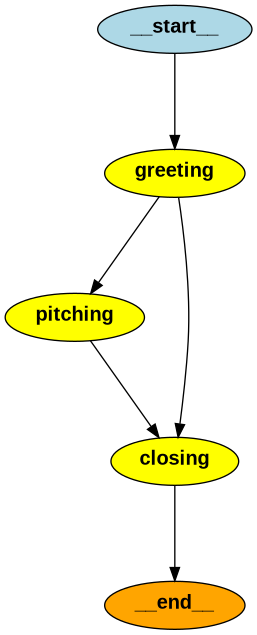

In [4]:
from IPython.display import Image

Image(workflow.get_graph().draw_png())

In [7]:
state = {
    "conversation_history": [],
    "customer_data": example_customer,
    "current_stage": "greeting",
    "product_info": Products_data["products_and_services"][0],
    "user_prompt": "Hello ?",
    "interaction_result": None, 
    "company_data":company_data_summarized
}



In [10]:
while state["current_stage"] != END:
    if state["conversation_history"]:
        print(f"AI: {state['conversation_history'][-1]}")
    
    user_input = input("You: ")  # Get user input dynamically
    state["user_prompt"] = user_input
    
    agent_function = workflow.invoke(state)
    state = agent_function(state)

print("Conversation ended.")